In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [141]:
#Read in the CDC data into a dataframe.
births = pd.read_csv('births.csv')

In [142]:
#View a snap-shot of the dataset.
births.head()

year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

In [143]:
#Use the year colummn to create a decade column.
births['decade'] = 10 * (births['year'] // 10)

In [144]:
#Display table containing female and male deaths for each decade.
births.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum')

gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428

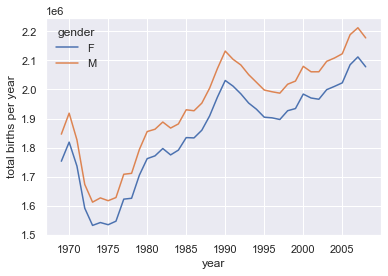

In [145]:
#Plot births.
sns.set()
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()
plt.ylabel('total births per year');

In [146]:
#Remove outliers.
quartiles = np.percentile(births['births'], [25, 50, 75])

In [147]:
mu = quartiles[1]

In [148]:
sig = 0.74 * (quartiles[2] - quartiles[0])

In [149]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [150]:
births['day'] = births['day'].astype(int)

In [151]:
births.index = pd.to_datetime(10000 * births.year +
                             100 * births.month +
                             births.day, format = '%Y%m%d')

In [152]:
births['dayofweek'] = births.index.dayofweek

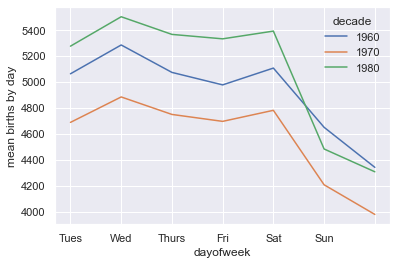

In [153]:
#Plot data.
births.pivot_table('births', index = 'dayofweek',
                  columns = 'decade', aggfunc = 'mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [154]:
#Plot the mean number of births by the day of the year.

In [155]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

In [156]:
births_by_date.index = [pd.datetime(2012, month, day)
                       for (month, day) in births_by_date.index]

In [157]:
births_by_date.head()

births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625

<AxesSubplot:>

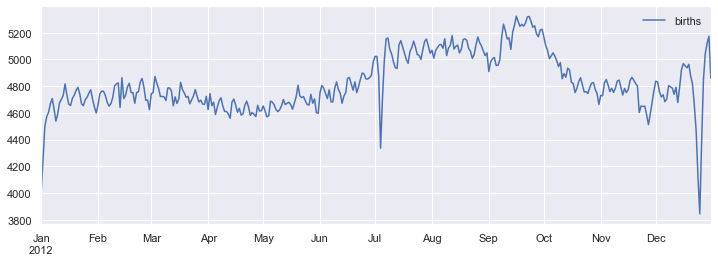

In [158]:
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax)

In [159]:
##Recreate the Average Daily Birth Rate Table.

In [160]:
quartiles = np.percentile(births['births'], [25, 50, 75])

In [161]:
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])

In [162]:
births = births.query('(births > @mu - 5 *@sig) & (births < @mu + 5 * @sig)')

In [163]:
births['day'] = births['day'].astype(int)

In [164]:
births.index = pd.to_datetime(10000 * births.year +
                             100 * births.month + 
                             births.day, format = '%Y%m%d')

In [165]:
births_by_date = births.pivot_table('births',
                                   [births.index.month, births.index.day])

In [166]:
births_by_date.index = [pd.datetime(2012, month, day)
                       for (month, day) in births_by_date.index]

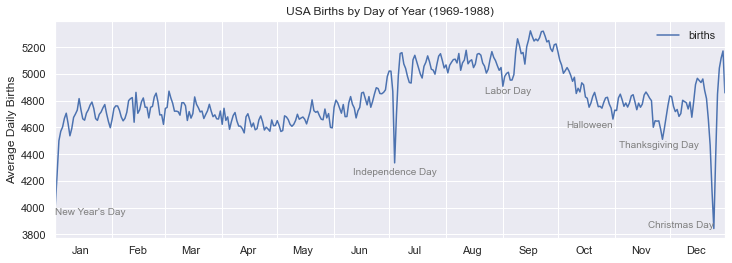

In [167]:
#Display the chart.
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax);

#Add text
style = dict(size = 10, color = 'gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha = 'center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha = 'center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha = 'right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving Day", ha = 'center', **style)
ax.text('2012-12-25', 3850, "Christmas Day", ha = 'right', **style)

ax.set(title = 'USA Births by Day of Year (1969-1988)',
      ylabel = 'Average Daily Births')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday = 15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));